### Laptop Price Prediction ML Project 

Introduction About the Data : 
In today’s technology-driven world, laptops come in a wide range of configurations, brands, and price points. For consumers and sellers alike, predicting a laptop’s price based on its specifications is both a practical and valuable capability. This project aims to develop a machine learning-based solution that accurately predicts the price of a laptop using its technical specifications such as brand, processor speed, RAM size, storage capacity, screen size, and weight.

By leveraging data science and machine learning techniques, this project demonstrates how historical laptop data can be used to build a regression model capable of estimating the price of a new or used laptop. Such models can be highly beneficial for e-commerce platforms, retailers, or individual sellers looking to recommend fair pricing to customers.

	•	Helps automate laptop price estimation without manual comparison.
	•	Demonstrates how machine learning can be applied to real-world business scenarios.
	•	Provides hands-on experience with data preprocessing, modeling, evaluation, and app deployment.

I have solved EDA step by step

### Import Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error


### Load Dataset

In [171]:
data = pd.read_csv('Laptop_price (1).csv')
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


### Overview

In [74]:
data.info()                            # Data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [173]:
data.shape        

(1000, 7)

In [177]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [78]:
# Descriptive Statistics
data.describe()                     # Summary stats for numeric columns

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [175]:
data.isnull().sum()                       # Missing values

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [181]:
data.duplicated().sum()

0

In [82]:
data['Brand'].value_counts()   

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

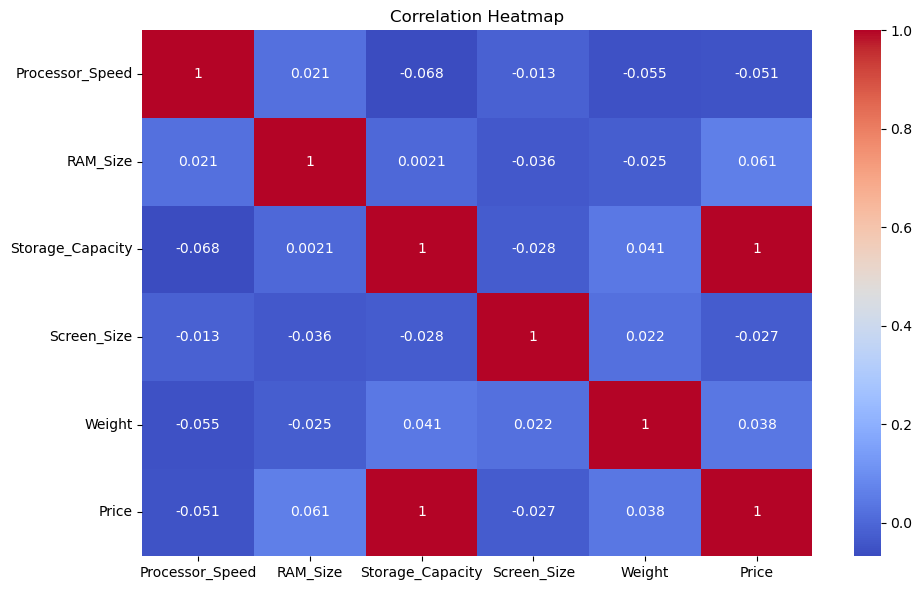

In [85]:
 # Correlation Heatmap.  #Understand how features relate to price.

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [98]:
data.corr()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,1.000000,-0.006958,0.013622,-0.008166,-0.031384,-0.022911,-0.008365
Processor_Speed,-0.006958,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.013622,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.008166,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.031384,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.022911,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.008365,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


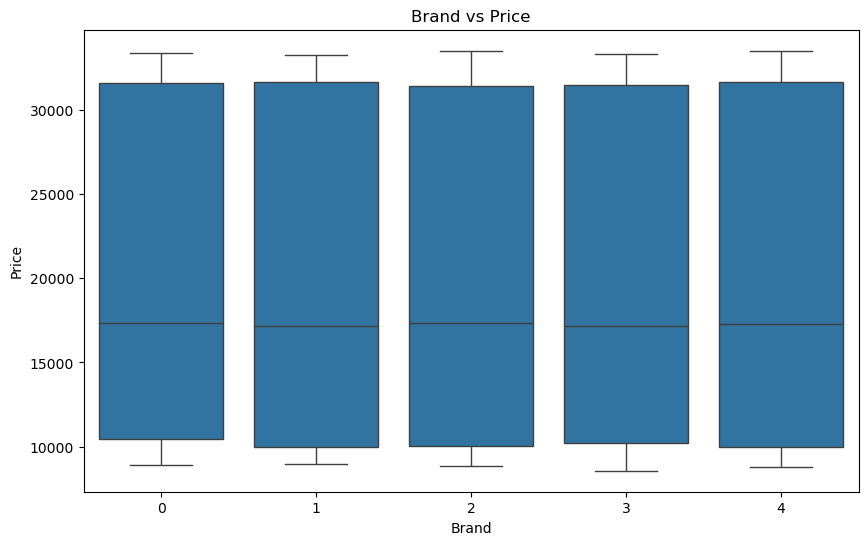

In [100]:
 # Brand vs Price Boxplot.  

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Brand', y='Price')
plt.title("Brand vs Price")                      # price distribution by brand
plt.show()



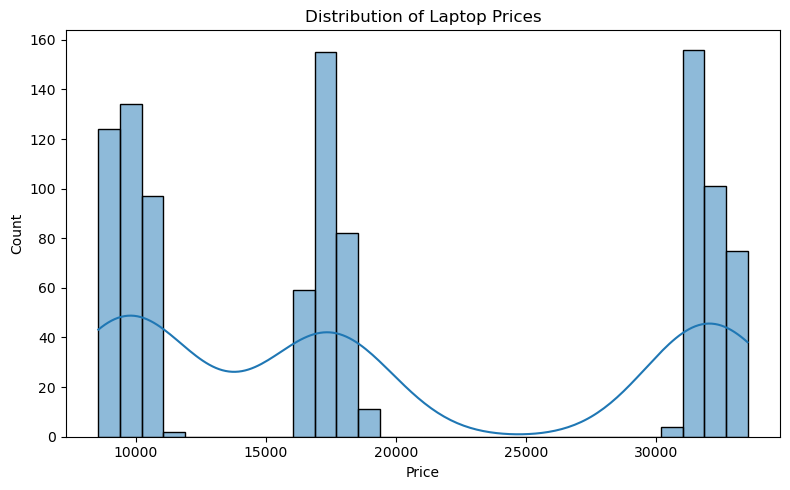

In [102]:
# Price Distribution.
#Check skewness or normal distribution.

plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title("Distribution of Laptop Prices")
plt.tight_layout()
plt.show()

### Preprocessing

In [107]:
#Encode Categorical Variables 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Brand'] = le.fit_transform(data['Brand'])  # Now all strings are numbers

### Define Features and Target

In [110]:
x = data.drop(["Price"], axis=1)
x

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,1,3.830296,16,512,11.185147,2.641094
1,0,2.912833,4,1000,11.311372,3.260012
2,4,3.241627,4,256,11.853023,2.029061
3,0,3.806248,16,512,12.280360,4.573865
4,0,3.268097,32,1000,14.990877,4.193472
...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399
996,2,2.780555,8,256,12.679356,3.750265
997,2,3.200569,4,512,12.666315,3.392612
998,1,1.604182,8,256,11.215581,3.857613


In [112]:
y = data.Price
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [114]:
categorical_cols=x.select_dtypes(include='object').columns
categorical_cols

Index([], dtype='object')

In [116]:
numerical_cols=x.select_dtypes(exclude='object').columns
numerical_cols

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight'],
      dtype='object')

### Train-Test Split

In [129]:
# Split the data into 80% training and 20% testing:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
x_train

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
29,1,3.799639,8,1000,12.853007,2.151678
535,0,3.298004,16,512,15.144079,2.587267
695,3,2.433129,4,512,15.046398,2.264456
557,0,3.313144,32,512,12.836309,2.376126
836,3,3.162279,16,512,14.701664,2.943887
...,...,...,...,...,...,...
106,4,1.953589,32,256,14.320274,3.534916
270,4,2.096943,16,1000,14.492863,4.989697
860,2,2.884506,4,1000,11.458639,4.942381
435,1,2.074887,4,256,15.417373,2.991174


In [133]:
y_train

29     31747.604606
535    17515.915181
695    17073.491966
557    18399.777107
836    17787.920193
           ...     
106    10711.444213
270    32205.991801
860    31500.579122
435     9059.269729
102    10462.141839
Name: Price, Length: 800, dtype: float64

### Model Training

In [136]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Evaluation

In [163]:
y_pred = lr.predict(x_test)
y_pred

array([10749.36976753, 31559.86240702,  9636.77246999,  9245.55916245,
       32017.27371237, 31650.11264118, 10323.6103976 , 16952.7874164 ,
       18487.56581017, 32364.58851357,  9898.52740042, 10634.41498555,
       32933.74018511,  9283.51528742, 17291.36777973,  8963.62291827,
       32079.67831413, 32208.3734259 , 10491.12799106, 31667.06096831,
       10596.64457389, 10648.69034859,  9149.89711393, 10388.23872246,
        9489.4434664 , 17517.70262426, 10737.03601835, 18279.19896376,
       10799.25635213, 32654.76665468, 16878.49628853, 32779.25555972,
       16666.84587344, 31945.11725591, 31589.24133735, 10550.90186413,
       31251.57447461,  9021.30470443, 32646.68926986, 17307.37171155,
       32179.60252484,  9566.42411123, 17595.77834966, 31704.8854172 ,
       17252.40474139, 16766.24310755, 32678.78301672, 16775.8657604 ,
        9728.85771543, 17024.97320937, 16905.06708748, 31597.10493313,
        9747.31057639, 10445.83559088, 32012.15812747, 32796.96135913,
      

In [141]:
y_pred = lr.predict(x_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred))  

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

print("mean_squared_error",mean_squared_error(y_test, y_pred))

Linear Regression R² Score: 0.9996478987127725
Mean Absolute Error: 145.2723500795968
mean_squared_error 31969.582469869492


### Save Model

In [145]:
import joblib
joblib.dump(lr, 'laptop_price_model.pkl')

['laptop_price_model.pkl']

In [149]:
joblib.dump(lr, 'laptop_price_sacled.joblib')

['laptop_price_sacled.joblib']

In [151]:
joblib.dump(lr, 'laptop_price_model.joblib')

['laptop_price_model.joblib']

 Build a Streamlit web app to make predictions